In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier     # Decision Tree
from sklearn.ensemble import RandomForestClassifier # RF

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

import time
from pprint import pprint
import pickle 




In [27]:
fetal_base_df = pd.read_csv('fetal_health.csv')
fetal_base_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [28]:
fetal_base_df.dropna(inplace = True)
fetal_base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [29]:
fetal_base_df['fetal_health'].value_counts(normalize=True)
#unblanaced dataset - use Stratified KFolds


fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

In [30]:
X = fetal_base_df.drop(columns=['fetal_health'])
y = fetal_base_df['fetal_health']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 31)

In [31]:
rfClass = RandomForestClassifier(random_state=31)



In [32]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [33]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=99)

model_random_cv = RandomizedSearchCV(estimator = rfClass,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = 'f1_macro',
                                   cv = folds,
                                   verbose = 1,
                                   random_state = 99,
                                   n_jobs = -1)

In [34]:
start = time.time()            # Start Time
model_random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 30.59273099899292s


In [35]:
cv_results = pd.DataFrame(model_random_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.197763,0.019682,0.012706,0.003922,200,5,20,2,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.689476,0.687146,0.664268,0.642127,0.615883,0.659780,0.027891,93
1,0.426709,0.014997,0.019942,0.002279,350,5,10,4,"{'n_estimators': 350, 'min_samples_split': 5, ...",0.787335,0.804937,0.822001,0.778947,0.800668,0.798778,0.014866,64
2,0.723838,0.025754,0.029252,0.003841,500,5,10,6,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.837855,0.816049,0.841540,0.791884,0.811566,0.819779,0.018219,36
3,0.515791,0.063097,0.023601,0.008591,350,20,20,6,"{'n_estimators': 350, 'min_samples_split': 20,...",0.802219,0.796268,0.818573,0.761055,0.801191,0.795861,0.018954,73
4,0.289629,0.024629,0.012542,0.003230,150,5,5,14,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.838749,0.854892,0.851129,0.847840,0.870381,0.852598,0.010374,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.764783,0.028751,0.029505,0.006094,400,5,5,14,"{'n_estimators': 400, 'min_samples_split': 5, ...",0.842068,0.854274,0.868417,0.867922,0.865065,0.859549,0.010125,1
96,0.486867,0.020613,0.020820,0.006218,300,10,20,20,"{'n_estimators': 300, 'min_samples_split': 10,...",0.805413,0.810516,0.833390,0.767333,0.806824,0.804695,0.021252,41
97,0.620147,0.010284,0.023556,0.002486,400,20,20,20,"{'n_estimators': 400, 'min_samples_split': 20,...",0.805413,0.810516,0.832004,0.757344,0.806824,0.802420,0.024499,54
98,0.395734,0.017651,0.016844,0.002890,300,5,20,6,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.802219,0.796268,0.823603,0.764164,0.806824,0.798616,0.019479,67


In [36]:
# Return the performance metric score
print('Initial score: ', model_random_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', model_random_cv.best_params_)

Initial score:  0.8595492636500858
Initial parameters:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 14}


In [37]:
param_grid_grid = {    
    'max_depth': [10, 11, 12, 13, 14],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [6, 7, 8, 9, 10],
    'n_estimators': [300, 350, 400, 450, 500]
    }

pprint(param_grid_grid)

{'max_depth': [10, 11, 12, 13, 14],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [6, 7, 8, 9, 10],
 'n_estimators': [300, 350, 400, 450, 500]}


In [38]:
model_grid_cv = GridSearchCV(estimator = rfClass, 
                            param_grid = param_grid_grid, 
                            scoring= 'f1_macro', 
                            cv = folds, 
                            verbose = 1,
                            n_jobs = -1)

In [39]:
start = time.time()            # Start Time
model_grid_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


Training time: 182.24969124794006s


In [40]:
print('Improved score: ', model_grid_cv.best_score_)
print('Improved parameters: ', model_grid_cv.best_params_)

Improved score:  0.8803004766137985
Improved parameters:  {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300}


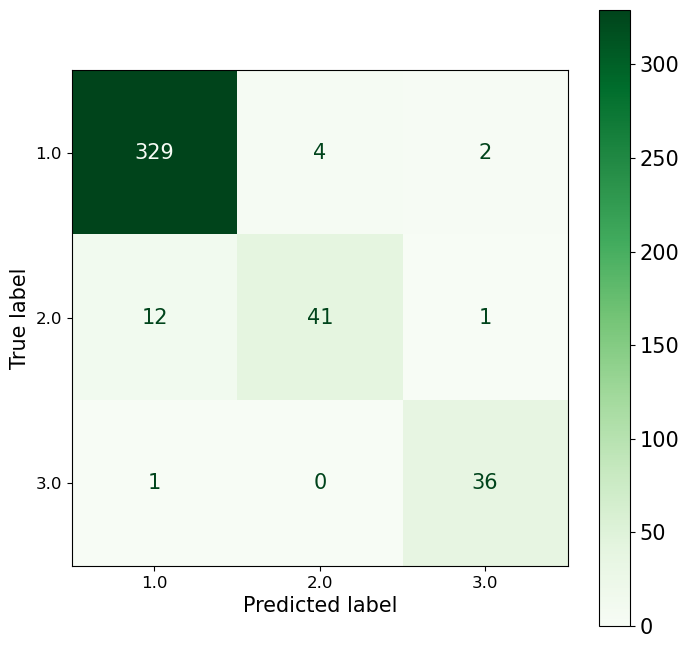

In [43]:
y_pred = model_grid_cv.predict(test_X)

confuse_m = confusion_matrix(test_y, y_pred, labels = model_grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = confuse_m, display_labels = model_grid_cv.classes_)

fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 15})
plt.yticks(fontsize = 12) 
plt.xticks(fontsize = 12) 

# Display Confusion Matrix
disp.plot(cmap = 'Greens', ax = ax);
fig.savefig('rf_confusion_mat.svg')

In [44]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
report_df.to_csv('rf_class_report.csv') 

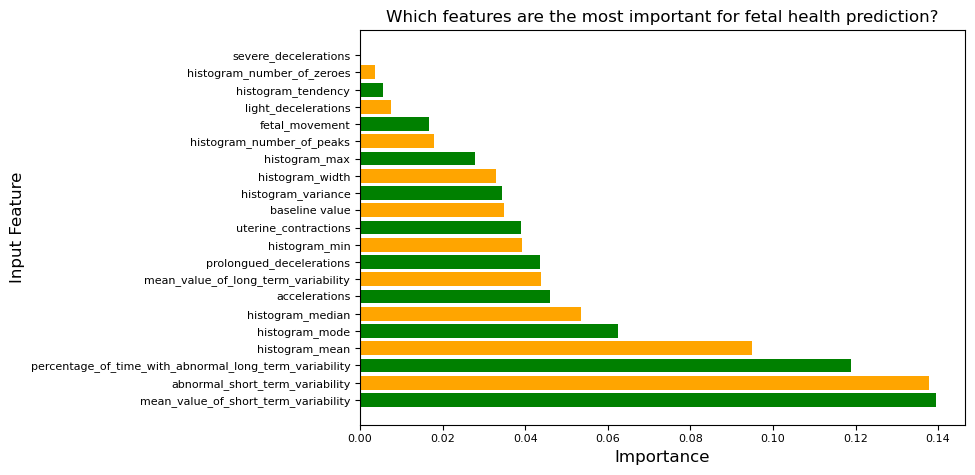

In [66]:

importance = model_grid_cv.best_estimator_.feature_importances_

feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
ap = plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['green', 'orange'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for fetal health prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) 
plt.xticks(fontsize = 8) 

plt.tight_layout();
ap.savefig('rf_feature_imp.svg')

In [48]:
rf_pickle = open('rf_fetal.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_grid_cv, rf_pickle) 

# Close the file
rf_pickle.close()

In [49]:
# Decision Tree
DTclass = DecisionTreeClassifier(random_state = 17)


In [50]:
dt_hyper_params = {
    'max_depth': [50,100,150,200],
    'min_samples_split': [10,20,30,40,50],
    'min_samples_leaf':[5,10,15,25,40]
}

In [51]:
dt_folds = StratifiedKFold(n_splits=5,shuffle=True, random_state=17)

dt_random_cv = RandomizedSearchCV(estimator = DTclass,
                                  param_distributions = dt_hyper_params,
                                  n_iter = 100,
                                  scoring = 'f1_macro',
                                  cv = dt_folds,
                                  verbose = 1,
                                  random_state = 17,
                                  n_jobs =- 1)


In [52]:
start = time.time()            # Start Time
dt_random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Training time: 2.3670082092285156s


In [53]:
# Return the performance metric score
print('Initial score: ', dt_random_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', dt_random_cv.best_params_)

Initial score:  0.8692948921054022
Initial parameters:  {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 50}


In [54]:
dt_hyper_params_new = {
    'max_depth': [15,20,25,30,35],
    'min_samples_leaf': list(range(2,8)),
    'min_samples_split': list(range(2,15))
}

In [55]:
dt_grid_cv = GridSearchCV(estimator = DTclass,
                          param_grid = dt_hyper_params_new,
                          scoring = 'f1_macro',
                          cv = dt_folds,
                          verbose = 1,
                          n_jobs = -1)

In [56]:
start = time.time()            # Start Time
dt_grid_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 390 candidates, totalling 1950 fits
Training time: 4.860219955444336s


In [57]:
print('Improved score: ', dt_grid_cv.best_score_)
print('Improved parameters: ', dt_grid_cv.best_params_)

Improved score:  0.8734697312982374
Improved parameters:  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11}


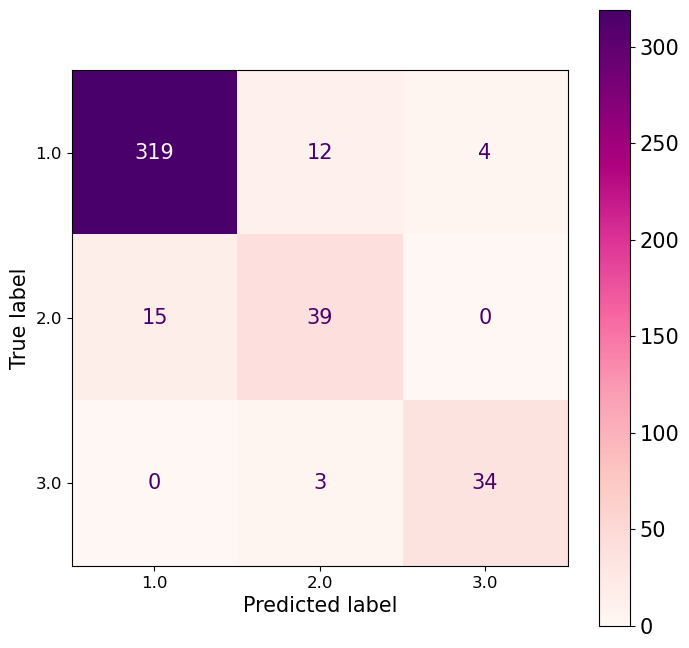

In [59]:
y_pred = dt_grid_cv.predict(test_X)

# Now generate confusion matrix
confuse_m_dt = confusion_matrix(test_y, y_pred, labels = dt_grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = confuse_m_dt, display_labels = dt_grid_cv.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 15})
plt.yticks(fontsize = 12) # fontsize of yticks
plt.xticks(fontsize = 12) # fontsize of xticks

# Display Confusion Matrix
disp.plot(cmap = 'RdPu', ax = ax);

In [60]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
report_df.to_csv('dt_class_report.csv') 

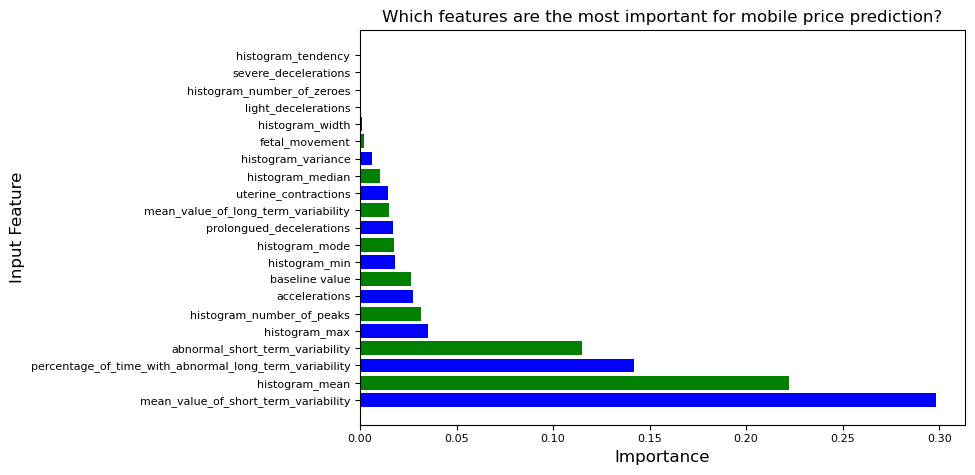

In [62]:
importance = dt_grid_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['blue', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for mobile price prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();

In [65]:
dt_pickle = open('dt_fetal.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_grid_cv, dt_pickle) 

# Close the file
dt_pickle.close() 